In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.12.0


In [4]:
df = pd.read_csv("yield_df.csv")
df = df.dropna()
df = df.drop(columns=["Year"])
df

,Unnamed: 0,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,22222,657.0,2550.07,19.76


In [5]:
df = df.iloc[:,1:]
df

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.00,16.37
1,Albania,Potatoes,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.00,16.37
3,Albania,Sorghum,12500,1485.0,121.00,16.37
4,Albania,Soybeans,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,22222,657.0,2550.07,19.76


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
#selecting y (which will be predicted)
y = df.pop("hg/ha_yield")
y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hg/ha_yield, Length: 28242, dtype: int64

In [8]:
y.value_counts()

hg/ha_yield
10000     100
20000      98
100000     81
25000      37
23796      33
         ... 
146964      1
15591       1
50689       1
64106       1
22888       1
Name: count, Length: 11514, dtype: int64

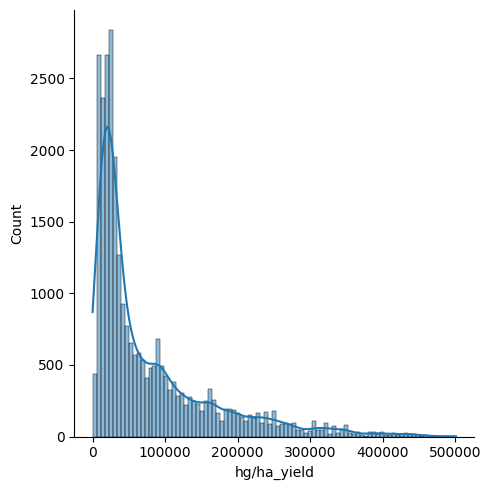

In [9]:
sns.displot(y, kde=True)

In [10]:
#get unique number of values
for col in df:
  print(col, df[col].nunique())

Area 101
Item 10
average_rain_fall_mm_per_year 100
pesticides_tonnes 1673
avg_temp 1831


In [11]:
#get unique values
for col in df:
  if df[col].dtype == 'object':
    print(col, df[col].unique())

Area ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajik

In [12]:
#encode
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for col in df:
  if df[col].dtype == 'object':
    df[col] = enc.fit_transform(df[col].values.reshape(-1,1))
df

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.0,1.0,1485.0,121.00,16.37
1,0.0,3.0,1485.0,121.00,16.37
2,0.0,4.0,1485.0,121.00,16.37
3,0.0,5.0,1485.0,121.00,16.37
4,0.0,6.0,1485.0,121.00,16.37
...,...,...,...,...,...
28237,100.0,4.0,657.0,2550.07,19.76
28238,100.0,5.0,657.0,2550.07,19.76
28239,100.0,6.0,657.0,2550.07,19.76
28240,100.0,7.0,657.0,2550.07,19.76


<Axes: >

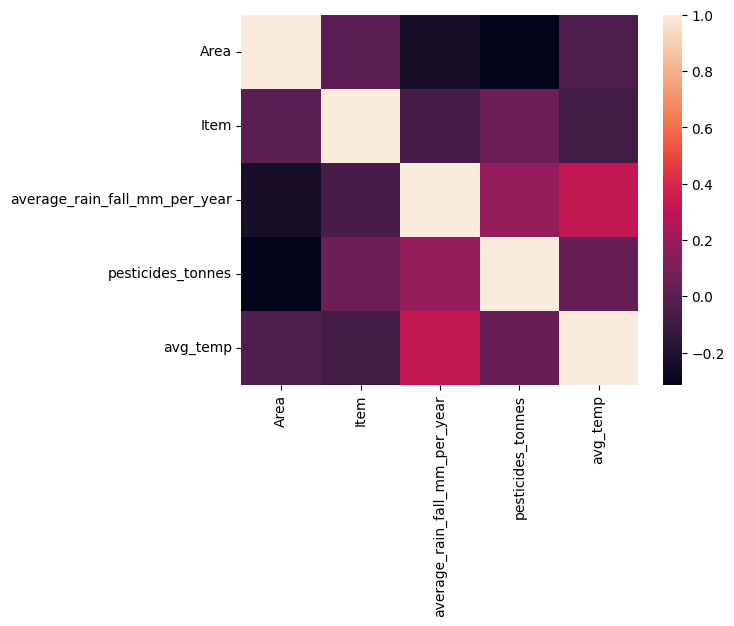

In [13]:
corr = df.corr()
sns.heatmap(corr)

In [75]:
corr

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area,1.000000,0.003169,-0.233549,-0.313573,-0.045739
Item,0.003169,1.000000,-0.062580,0.048070,-0.078257
average_rain_fall_mm_per_year,-0.233549,-0.062580,1.000000,0.180984,0.313040
pesticides_tonnes,-0.313573,0.048070,0.180984,1.000000,0.030946
avg_temp,-0.045739,-0.078257,0.313040,0.030946,1.000000


In [15]:
#standardise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in df:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))

In [176]:
X = df
X

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,-1.734041,-1.298110,0.473294,-0.616366,-0.661069
1,-1.734041,-0.539181,0.473294,-0.616366,-0.661069
2,-1.734041,-0.159716,0.473294,-0.616366,-0.661069
3,-1.734041,0.219749,0.473294,-0.616366,-0.661069
4,-1.734041,0.599214,0.473294,-0.616366,-0.661069
...,...,...,...,...,...
28237,1.995503,-0.159716,-0.693232,-0.575853,-0.123991
28238,1.995503,0.219749,-0.693232,-0.575853,-0.123991
28239,1.995503,0.599214,-0.693232,-0.575853,-0.123991
28240,1.995503,0.978678,-0.693232,-0.575853,-0.123991


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25417, 5) (25417,) (2825, 5) (2825,)


In [18]:
y_train

17293     41546
141       24500
997       21697
9956     321208
4919       6018
          ...  
22108      5931
25335     47204
11573    238528
2173      10297
14600    132721
Name: hg/ha_yield, Length: 25417, dtype: int64

In [19]:
X_train

,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
17293,0.093435,-1.298110,-1.266634,-0.557231,-2.134467
141,-1.696746,0.219749,-1.493458,-0.613000,-0.539078
997,-1.547564,0.219749,-0.866521,-0.267187,-1.112594
9956,-0.316814,0.978678,1.744075,-0.614851,1.160875
4919,-1.174610,0.599214,-0.762266,-0.585449,-1.633829
...,...,...,...,...,...
22108,0.988526,0.219749,-0.922875,-0.418994,0.327534
25335,1.436071,0.219749,-0.722818,-0.064060,-1.359745
11573,-0.167633,-1.677575,-0.093063,0.317509,0.825004
2173,-1.361087,0.219749,2.137144,-0.584444,0.793318


In [20]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping

In [21]:
model = Sequential(name='vegtable_crops')
model.add(Dense(units=50, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear', name='output'))
model.summary()

Model: "vegtable_crops"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                300       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 output (Dense)              (None, 1)                 51        
                                                                 
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss= "mean_squared_error" , optimizer="RMSprop", metrics=["mse"])

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), batch_size=32, callbacks=early_stopping)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/300
795/795 [==============================] - 3s 2ms/step - loss: 8166325248.0000 - mse: 8166325248.0000 - val_loss: 6674101760.0000 - val_mse: 6674101760.0000
Epoch 2/300
795/795 [==============================] - 1s 2ms/step - loss: 6593459200.0000 - mse: 6593459200.0000 - val_loss: 6533926912.0000 - val_mse: 6533926912.0000
Epoch 3/300
795/795 [==============================] - 1s 2ms/step - loss: 6488821248.0000 - mse: 6488821248.0000 - val_loss: 6490323968.0000 - val_mse: 6490323968.0000
Epoch 4/300
795/795 [==============================] - 1s 2ms/step - loss: 6440538624.0000 - mse: 6440538624.0000 - val_loss: 6471459328.0000 - val_mse: 6471459328.0000
Epoch 5/300
795/795 [==============================] - 1s 2ms/step - loss: 6408991744.0000 - mse: 6408991744.0000 - val_loss: 6497242112.0000 - val_mse: 6497242112.0000
Epoch 6/300
795/795 [==============================] - 1s 2ms/step - loss: 6398411264.0000 - mse: 6398411264.0000 - val_loss: 6451756544.0000 - val_mse: 64

<function matplotlib.pyplot.show(close=None, block=None)>

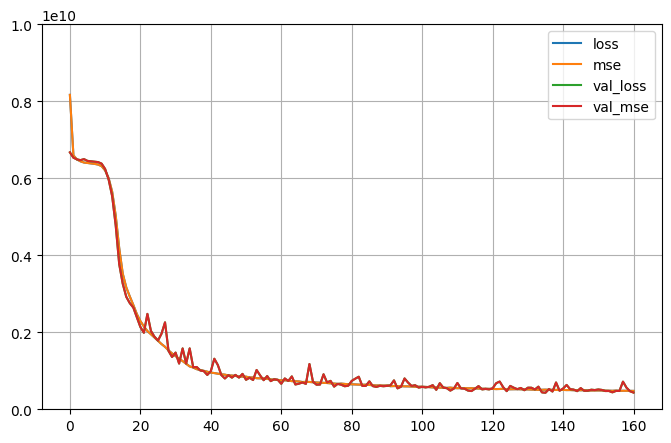

In [24]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,10000000000)
plt.show

In [25]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred

89/89 [==============================] - 0s 1ms/step


array([60287.008, 74255.01 , 11234.424, ..., 25719.375, 25719.873,
       11924.56 ], dtype=float32)

In [26]:
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

20822.09682306065

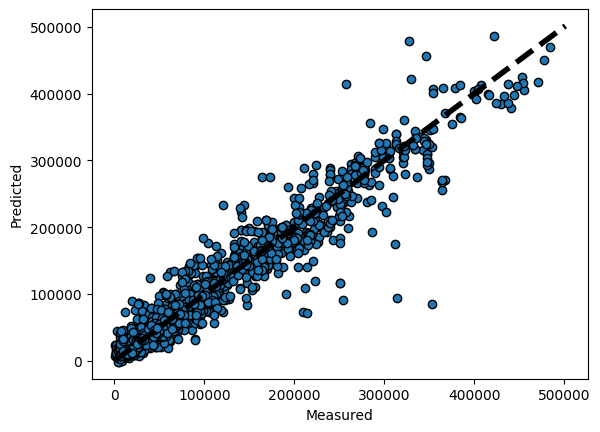

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

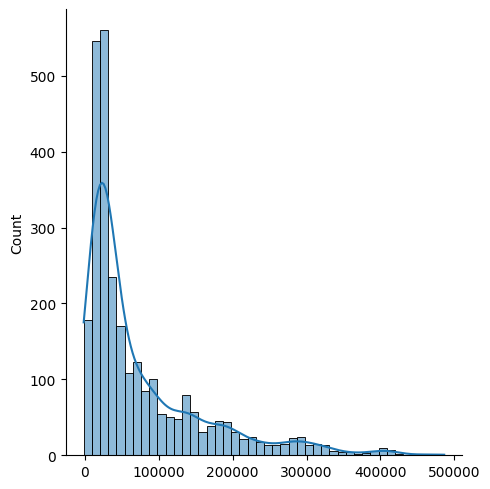

In [28]:
sns.displot(y_pred, kde=True)

In [29]:
df_test=pd.DataFrame({'actual_value': y_test.ravel(), 'predicted_value':y_pred.ravel()})
df_test

,actual_value,predicted_value
0,50005,60287.007812
1,49920,74255.007812
2,15572,11234.423828
3,32129,28262.244141
4,254321,235924.078125
...,...,...
2820,143848,158740.218750
2821,19757,18070.896484
2822,26188,25719.375000
2823,25195,25719.873047


# Saves model in .h5 file format

In [172]:
model.save("./model/dlmodel.h5")

###WORKING